In [1]:
import pandas as pd
from arcgis.gis import GIS
from arcgis.features import FeatureLayer

# Connect to the GIS
gis = GIS()

# URL of the feature service
feature_service_url = "https://services.arcgis.com/0jRlQ17Qmni5zEMr/arcgis/rest/services/LORP_Perennial_Pepperweed_Distribution_Public_View/FeatureServer/4"

# Access the feature layer
feature_layer = FeatureLayer(feature_service_url)

# Query all features
features = feature_layer.query(where="1=1", out_fields="*")

# Convert to pandas DataFrame
data = features.sdf

# Display first few rows
data.head()


C:\Users\znelson\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\znelson\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
c:\Users\znelson\AppData\Local\ESRI\conda\envs\arcgispro-py3-kriging-dtw\lib\site-packages\arcgis\features\geo\_io\serviceops.py:134: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


,OBJECTID,AssignedID,ObsCode,Observation,Type,AbundFreq,HgtLength,Width,Age,Treated,Evidence,Landform,MgmtUnit,Side,Photos,Comments,GlobalID,Date,SHAPE
0,14,31jz001,4,TARA,NA,1_5,1_2 m,LT_4in,Mature,None,NA,Bank,River,West,0,None,597b5442-94d3-46ce-8de5-a076bca6a838,2018-07-31 15:22:11.000,"{""x"": -13156275.3479, ""y"": 4429532.392099999, ..."
1,15,31jz002,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,Ox_West,West,2,None,638b9f63-aa53-4e36-91c8-49583e2f2a0e,2018-07-31 15:33:20.000,"{""x"": -13156374.2319, ""y"": 4429691.065800004, ..."
2,16,31jh002,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,2,None found in 2019,95b8a4ed-ade7-432a-b644-d69e4610f506,2019-07-31 18:24:42.315,"{""x"": -13156287.072900001, ""y"": 4429549.025799..."
3,17,,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,2,None,9b0cfb6e-e88d-4c79-b9e3-417aa53582be,2018-07-31 15:50:48.000,"{""x"": -13156288.0489, ""y"": 4429632.079099998, ..."
4,18,31DG001,4,TARA,NA,1_5,1_2 m,LT_4in,Mature,None,NA,Bank,River,West,0,Test,bbcf4add-ade4-42ac-83bf-45d9be4f2bfe,2018-07-31 15:18:56.000,"{""x"": -13156277.7478, ""y"": 4429532.9921, ""spat..."


In [2]:
# Count of unique values in each column
unique_counts = data.nunique()
print("Unique counts per column:\n", unique_counts)

# Summary of numerical data
numerical_summary = data.describe()
print("\nNumerical summary:\n", numerical_summary)

# Count occurrences of different 'Type'
type_counts = data['Type'].value_counts()
print("\nCount of different Types:\n", type_counts)

# Display summary
data_summary = {
    'Unique Counts': unique_counts,
    'Numerical Summary': numerical_summary,
    'Type Counts': type_counts
}

import ace_tools as tools; tools.display_dataframe_to_user(name="Data Summary", dataframe=data_summary)


Unique counts per column:
 OBJECTID       2332
AssignedID      892
ObsCode          52
Observation      14
Type             17
AbundFreq         9
HgtLength         9
Width             5
Age               9
Treated           6
Evidence          7
Landform          7
MgmtUnit          5
Side              5
Photos          124
Comments        786
GlobalID       2332
Date           2265
SHAPE          2302
dtype: int64

Numerical summary:
           OBJECTID      ObsCode                        Date
count  2332.000000  2332.000000                        2280
mean   1200.836621    29.078473  2020-06-21 20:46:08.787896
min      14.000000     0.000000         2018-07-31 15:18:56
25%     610.750000     1.000000  2019-08-05 15:01:23.220249
50%    1204.500000     1.000000  2020-08-04 15:47:21.950499
75%    1791.250000     4.000000  2020-11-09 22:05:15.262499
max    2375.000000  1233.000000  2024-07-10 21:44:07.364000
std     681.484180    83.457875                         NaN

Count of different

ModuleNotFoundError: No module named 'ace_tools'

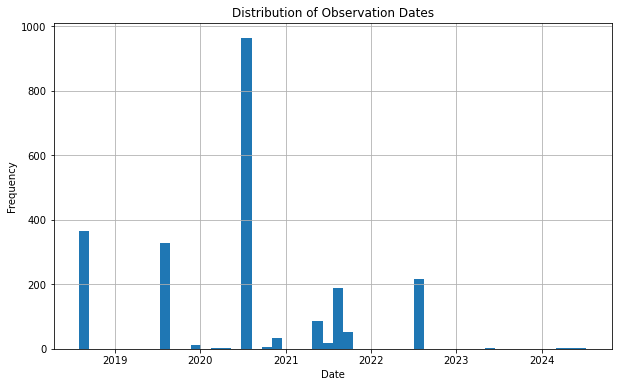

In [3]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot distribution of dates
plt.figure(figsize=(10, 6))
data['Date'].hist(bins=50)
plt.title('Distribution of Observation Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


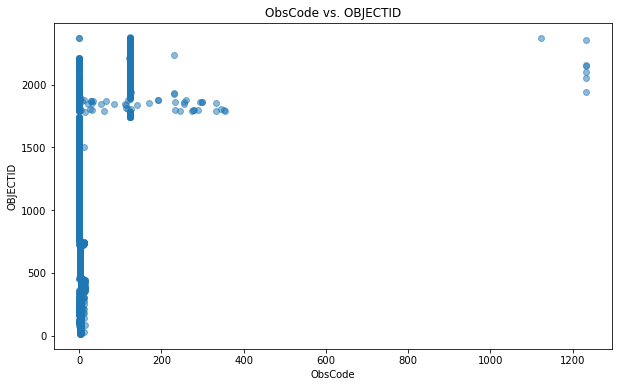

In [4]:
# Scatter plot between ObsCode and OBJECTID
plt.figure(figsize=(10, 6))
plt.scatter(data['ObsCode'], data['OBJECTID'], alpha=0.5)
plt.title('ObsCode vs. OBJECTID')
plt.xlabel('ObsCode')
plt.ylabel('OBJECTID')
plt.show()


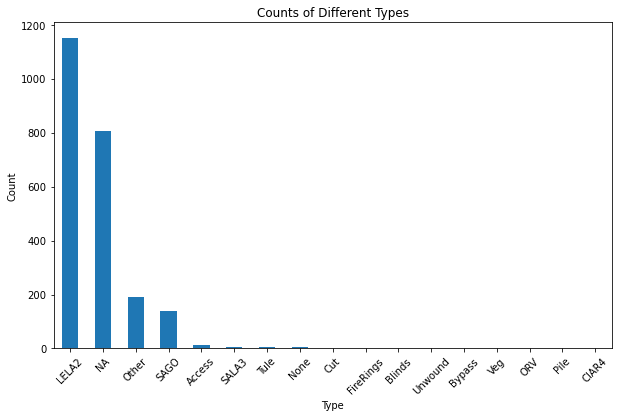

In [5]:
# Bar chart for Type counts
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Counts of Different Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#jupyter nbconvert --to html explore_feature_class.ipynb


In [6]:
# Filter data by Type = 'lela2'
lela2_data = data[data['Type'] == 'LELA2']


In [29]:
# Convert date column to datetime
lela2_data['Date'] = pd.to_datetime(lela2_data['Date'])

# Create geometry column
lela2_data['geometry'] = lela2_data['SHAPE'].apply(lambda x: Point(x['x'], x['y']))

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(lela2_data, geometry='geometry')

# Summarize unique values for each column
summary = lela2_data.nunique()
print(summary)


<ipython-input-29-997e4f10a3cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lela2_data['Date'] = pd.to_datetime(lela2_data['Date'])
<ipython-input-29-997e4f10a3cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lela2_data['geometry'] = lela2_data['SHAPE'].apply(lambda x: Point(x['x'], x['y']))


OBJECTID       1151
AssignedID      420
ObsCode          11
Observation       4
Type              1
AbundFreq         8
HgtLength         5
Width             2
Age               9
Treated           6
Evidence          3
Landform          7
MgmtUnit          4
Side              5
Photos           96
Comments        395
GlobalID       1151
Date           1105
SHAPE          1126
geometry       1126
dtype: int64


In [9]:
# Inspect the SHAPE column
lela2_data['SHAPE'].head()


1    {"x": -13156374.2319, "y": 4429691.065800004, ...
2    {"x": -13156287.072900001, "y": 4429549.025799...
3    {"x": -13156288.0489, "y": 4429632.079099998, ...
7    {"x": -13156280.1084, "y": 4429576.665799998, ...
8    {"x": -13156288.244800001, "y": 4429632.899700...
Name: SHAPE, dtype: geometry

In [10]:




import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Extract coordinates from SHAPE column
geometry = [Point(geom['x'], geom['y']) for geom in lela2_data['SHAPE']]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(lela2_data, geometry=geometry)

# Ensure CRS is set to WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Display first few rows of the GeoDataFrame to confirm
gdf.head()




,OBJECTID,AssignedID,ObsCode,Observation,Type,AbundFreq,HgtLength,Width,Age,Treated,Evidence,Landform,MgmtUnit,Side,Photos,Comments,GlobalID,Date,SHAPE,geometry
1,15,31jz002,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,Ox_West,West,2,None,638b9f63-aa53-4e36-91c8-49583e2f2a0e,2018-07-31 15:33:20.000,"{""x"": -13156374.2319, ""y"": 4429691.065800004, ...",POINT (-13156374.23190 4429691.06580)
2,16,31jh002,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,2,None found in 2019,95b8a4ed-ade7-432a-b644-d69e4610f506,2019-07-31 18:24:42.315,"{""x"": -13156287.072900001, ""y"": 4429549.025799...",POINT (-13156287.07290 4429549.02580)
3,17,,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,2,None,9b0cfb6e-e88d-4c79-b9e3-417aa53582be,2018-07-31 15:50:48.000,"{""x"": -13156288.0489, ""y"": 4429632.079099998, ...",POINT (-13156288.04890 4429632.07910)
7,25,31rt002,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,2,None,7361b771-1b91-4e61-8fe1-4ed94d71de60,2018-07-31 15:32:11.000,"{""x"": -13156280.1084, ""y"": 4429576.665799998, ...",POINT (-13156280.10840 4429576.66580)
8,26,31rt003,2,NOX,LELA2,1_5,NA,NA,Rose,NotTreated,NA,Bank,River,West,1,None,6f234c43-ac9d-49c4-8e5c-f9c28ecb19c4,2018-07-31 15:51:21.000,"{""x"": -13156288.244800001, ""y"": 4429632.899700...",POINT (-13156288.24480 4429632.89970)


In [30]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filter data by Type = 'lela2'
lela2_data = data[data['Type'] == 'LELA2'].copy()

# Convert date column to datetime
lela2_data.loc[:, 'Date'] = pd.to_datetime(lela2_data['Date'])

# Create geometry column
lela2_data.loc[:, 'geometry'] = lela2_data['SHAPE'].apply(lambda x: Point(x['x'], x['y']))

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(lela2_data, geometry='geometry')

# Summarize unique values for each column
summary = lela2_data.nunique()
print(summary)


OBJECTID       1151
AssignedID      420
ObsCode          11
Observation       4
Type              1
AbundFreq         8
HgtLength         5
Width             2
Age               9
Treated           6
Evidence          3
Landform          7
MgmtUnit          4
Side              5
Photos           96
Comments        395
GlobalID       1151
Date           1105
SHAPE          1126
geometry       1126
dtype: int64


In [32]:
conda install -c conda-forge folium


Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
 - defaults
 - esri

Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\znelson\AppData\Local\ESRI\conda\envs\arcgispro-py3-kriging-dtw

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       h56e8100_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    folium-0.17.0              |     pyhd8ed1ab_0          77 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         384 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.7.2-pyhd8ed1ab_0 
  folium 

In [45]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered on an appropriate location
m = folium.Map(location=[36.5, -118.5], zoom_start=10)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Convert to EPSG:4326
gdf = gdf.to_crs(epsg=4326)
# Add markers to the map
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=(
            f"Date: {row['Date']}<br>"
            #f"OBJECTID: {row['OBJECTID']}<br>"
            #f"AssignedID: {row['AssignedID']}<br>"
            #f"ObsCode: {row['ObsCode']}<br>"
            f"Observation: {row['Observation']}<br>"
            f"Type: {row['Type']}<br>"
            f"AbundFreq: {row['AbundFreq']}<br>"
            #f"HgtLength: {row['HgtLength']}<br>"
            #f"Width: {row['Width']}<br>"
            #f"Age: {row['Age']}<br>"
            #f"Treated: {row['Treated']}<br>"
            #f"Evidence: {row['Evidence']}<br>"
            #f"Landform: {row['Landform']}<br>"
            #f"MgmtUnit: {row['MgmtUnit']}<br>"
            #f"Side: {row['Side']}<br>"
            f"Comments: {row['Comments']}<br>"
            #f"Photos: {row['Photos']}"
            #f"GlobalID: {row['GlobalID']}<br>"
            #f"Date: {row['Date']}"
        )
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('perennial_pepperweed_map.html')

# Display the map in the notebook (optional, if running in a Jupyter notebook)
m


In [35]:
# Print the GeoDataFrame to verify
print(gdf[['geometry']].head())


                            geometry
1  POINT (-13156374.232 4429691.066)
2  POINT (-13156287.073 4429549.026)
3  POINT (-13156288.049 4429632.079)
7  POINT (-13156280.108 4429576.666)
8  POINT (-13156288.245 4429632.900)


In [36]:

# Summarize unique values for each column
summary = lela2_data.nunique()
print(summary)

OBJECTID       1151
AssignedID      420
ObsCode          11
Observation       4
Type              1
AbundFreq         8
HgtLength         5
Width             2
Age               9
Treated           6
Evidence          3
Landform          7
MgmtUnit          4
Side              5
Photos           96
Comments        395
GlobalID       1151
Date           1105
SHAPE          1126
geometry       1126
dtype: int64


In [37]:
# Filter data by Type = 'lela2'
lela2_data = data[data['Type'] == 'LELA2'].copy()

# Convert date column to datetime
lela2_data.loc[:, 'Date'] = pd.to_datetime(lela2_data['Date'])

# Create geometry column
lela2_data.loc[:, 'geometry'] = lela2_data['SHAPE'].apply(lambda x: Point(x['x'], x['y']))

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(lela2_data, geometry='geometry', crs='EPSG:3857')

# Convert to EPSG:4326
gdf = gdf.to_crs(epsg=4326)

# Print the GeoDataFrame to verify
print(gdf[['geometry']].head())

# Summarize unique values for each column
summary = lela2_data.nunique()
print(summary)


                      geometry
1  POINT (-118.18572 36.93242)
2  POINT (-118.18494 36.93140)
3  POINT (-118.18495 36.93200)
7  POINT (-118.18488 36.93160)
8  POINT (-118.18495 36.93200)
OBJECTID       1151
AssignedID      420
ObsCode          11
Observation       4
Type              1
AbundFreq         8
HgtLength         5
Width             2
Age               9
Treated           6
Evidence          3
Landform          7
MgmtUnit          4
Side              5
Photos           96
Comments        395
GlobalID       1151
Date           1105
SHAPE          1126
geometry       1126
dtype: int64


In [40]:
# Query unique values in AbundFreq
unique_abundfreq = gdf['Observation'].unique()
print(unique_abundfreq)


['NOX' 'None' 'TARA' 'SLASH']


In [42]:
print(gdf['Comments'].unique())

['None' ' None found in 2019' 'none found ' 'Stretches down stream 10m'
 'Test' '40 Meters apart'
 'Seedlings and a few flowering/fruiting mixed in'
 'Site around the bank ~25m from 01BL002' 'No live LELA2 found in 2019'
 'new plants appear untreated'
 'Very large site almost an acre. Some LELA2 also down on bank '
 'Treated. It certainly not dead' 'On both side of large SAGO (willows)'
 'Treated but certainly not dead ' 'Looks treated but certainly no dead'
 'None found in 2019.  Older LELA2 look treated and dead'
 'Many old LELA2 treated and dead, but other still live and doing well.  Many more LELA2 to NE also'
 'Old LELA2 treated and dead, but new plants live and doing well.   some plants on bank also'
 'Most plant treated and dead, but live plants still north and south of point'
 'All LELA2 look dead' 'Bank to floodplain 8x4m area' 'None found '
 'Small Point at north end, extends south 30 m where thicker clump. Revisit. I.d. Olrt005'
 'Along river and a larger cluster 10m East' '

In [47]:
# Sort data by date in descending order
sorted_data = gdf.sort_values(by='Date', ascending=False)

# Select relevant columns
sorted_table = sorted_data[['Date', 'AbundFreq', 'OBJECTID', 'AssignedID', 'ObsCode', 'Observation', 'Type', 'HgtLength', 'Width', 'Age', 'Treated', 'Evidence', 'Landform', 'MgmtUnit', 'Side', 'Photos', 'Comments', 'GlobalID']]

# Display the table
print(sorted_table.to_string())

# If you're using Jupyter Notebook, you can use the following to display as a table:
sorted_table

                           Date    AbundFreq  OBJECTID      AssignedID  ObsCode Observation   Type HgtLength Width       Age     Treated Evidence    Landform MgmtUnit   Side      Photos                                                                                              Comments                              GlobalID
2329 2024-07-10 21:44:07.364000         None      2373           LELA2      123        None  LELA2      None  None      None        None     None        None     None   None        None                                                                                                  None  e90d4d66-7ce5-41d9-b6f6-cab8b696134e
2327 2024-04-10 16:05:59.927000         None      2371               Z        1        None  LELA2      None  None      None        None     None        None     None   None        None                                                                                                  None  bc82b9c2-55b7-4d6b-9064-af016120e569
2326 2024-04-10 15:49:

,Date,AbundFreq,OBJECTID,AssignedID,ObsCode,Observation,Type,HgtLength,Width,Age,Treated,Evidence,Landform,MgmtUnit,Side,Photos,Comments,GlobalID
2329,2024-07-10 21:44:07.364000,None,2373,LELA2,123,None,LELA2,None,None,None,None,None,None,None,None,None,None,e90d4d66-7ce5-41d9-b6f6-cab8b696134e
2327,2024-04-10 16:05:59.927000,None,2371,Z,1,None,LELA2,None,None,None,None,None,None,None,None,None,None,bc82b9c2-55b7-4d6b-9064-af016120e569
2326,2024-04-10 15:49:28.269999,6_25,2370,Lela2,1,None,LELA2,None,None,None,None,None,None,None,None,None,None,588d1984-3fb1-454b-a0b2-c6baf4703cba
2325,2023-06-08 16:48:06.381999,6_25,2369,LELA2 IND132,1123,None,LELA2,< 1m,None,Flwr_frt,None,None,None,None,None,None,None,ffa4057f-48dc-4919-be9e-2a4e6c129603
2323,2023-06-07 19:13:49.483999,>100,2367,LELA2 IND133,123,None,LELA2,< 1m,None,Mature,NotTreated,None,Upland,None,None,None,None,0e8dbcfe-a854-4b1a-9ef3-57843230a26c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,NaT,None,2210,Airport-run12,1,None,LELA2,None,None,None,None,None,None,None,None,None,None,488a2f78-62e7-4369-b44b-f6d903741ce3
2173,NaT,26_100,2217,Sgr01,123,NOX,LELA2,None,None,Flwr_frt,Some,None,None,None,None,None,Closer to the fence line than river,f9646069-0898-4a4c-bf92-180612605c8c
2205,NaT,None,2249,Sgr03,123,NOX,LELA2,None,None,None,None,None,None,None,None,None,None,3b35415f-8829-4745-967d-e1969a1885cf
2330,NaT,None,2374,123,123,None,LELA2,None,None,None,None,None,None,None,None,None,None,64140aa8-8af4-41ae-b276-042938c444f5
